## 聯立方程式

In [8]:
import numpy as np

A = np.array([[2,4],
              [6,2]])

B = np.array([[18],
              [34]])

C = np.linalg.solve(A, B)

print(C)

[[5.]
 [2.]]


In [9]:
np.linalg.inv(A.T @ A) @ A.T @ B

array([[5.],
       [2.]])

## 範例1. 以最小平方法(OLS)建立線性迴歸模型，預測波士頓(Boston)房價

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn import datasets

# 載入 sklearn 內建資料集
ds = datasets.load_boston()

# 特徵變數
X=ds.data

# b = b * x^0
b=np.ones((X.shape[0], 1))

# 將 b 併入 w
X=np.hstack((X, b))

# 目標變數
y = ds.target

# 以公式求解
W = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'W={W}')

W=[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]


In [8]:
# 計算效能衡量指標
SSE = ((X @ W - y ) ** 2).sum() 
MSE = SSE / y.shape[0]
RMSE = MSE ** (1/2)
print(f'MSE={MSE}')
print(f'RMSE={RMSE}')

# 計算判別係數(R^2)
y_mean = y.ravel().mean()
SST = ((y - y_mean) ** 2).sum()
R2 = 1 - (SSE / SST)
print(f'R2={R2}')

MSE=21.8948311817292
RMSE=4.679191295697281
R2=0.7406426641094095


## 以 sklearn 驗證

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 模型訓練
lr = LinearRegression()
lr.fit(X, y)

# 預測
y_pred = lr.predict(X)

# 迴歸係數
print(f'W={lr.coef_},{lr.intercept_}\n')

# 計算效能衡量指標
print(f'MSE={mean_squared_error(y, y_pred)}')
print(f'RMSE={mean_squared_error(y, y_pred) ** .5}')
print(f'R2={r2_score(y, y_pred)}')

W=[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  0.00000000e+00],36.45948838509001

MSE=21.894831181729206
RMSE=4.679191295697282
R2=0.7406426641094094


## 使用 SciPy 以最小平方法(OLS) 計算函數的最小值

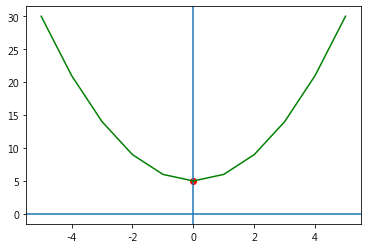

In [32]:
# 函數繪圖
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

x=np.linspace(-5, 5, 11)
# x^2+5
def f(x):
    return x**2+5

# 繪座標軸
plt.axhline()
plt.axvline()
# 繪圖
plt.plot(x, f(x), 'g')
plt.scatter([0],[5], color='r')

In [27]:
import numpy as np
from scipy.optimize import leastsq

# x^2+5
def f(x):
    return x**2+5

# 最小平方法
leastsq(f, 5, full_output=1) # full_output=1 ==> 顯示詳盡的結果

(array([1.72892379e-05]),
 None,
 {'fvec': array([5.]),
  'nfev': 22,
  'fjac': array([[-0.]]),
  'ipvt': array([1], dtype=int32),
  'qtf': array([5.])},
 'The cosine of the angle between func(x) and any column of the\n  Jacobian is at most 0.000000 in absolute value',
 4)

In [24]:
def f(x):
    return np.arctan(x) - np.arctan(np.linspace(0, 1, len(x)))

# 最小平方法
leastsq(f, 10, full_output=1) # full_output=1 ==> 顯示詳盡的結果 

(array([0.]),
 array([[1.]]),
 {'fvec': array([0.]),
  'nfev': 67,
  'fjac': array([[-1.]]),
  'ipvt': array([1], dtype=int32),
  'qtf': array([0.])},
 'The cosine of the angle between func(x) and any column of the\n  Jacobian is at most 0.000000 in absolute value',
 4)

## 使用 SciPy 其他優化方法計算函數的最小值

In [36]:
import numpy as np
from scipy import optimize

# x^2+5
def f(x):
    return (x**2)+5

# 最小平方法
x_min = optimize.brent(f, full_output=1)  
x_min

(1.147310308261937e-08, 5.0, 37, 41)